In [ ]:
from google.colab import drive
drive.mount('/content/drive/')
%cd /content/drive/My\ Drive/Colab_Notebooks

Drive already mounted at /content/drive/; to attempt to forcibly remount, call drive.mount("/content/drive/", force_remount=True).
/content/drive/My Drive/Colab_Notebooks


In [ ]:
%cd coursera-deep-learning-specialization-master/C4\ \-\ Convolutional\ Neural\ Networks/Week\ 1

/content/drive/My Drive/Colab_Notebooks/coursera-deep-learning-specialization-master/C4 - Convolutional Neural Networks/Week 1


In [ ]:
%tensorflow_version 1.x

TensorFlow 1.x selected.


In [ ]:
import math
import numpy as np
import h5py
import matplotlib.pyplot as plt
import scipy
from PIL import Image
from scipy import ndimage
import tensorflow as tf
from tensorflow.python.framework import ops
from cnn_utils import *

%matplotlib inline
np.random.seed(1)

In [ ]:
# Loading the data (signs)
X_train_orig, Y_train_orig, X_test_orig, Y_test_orig, classes = load_dataset()

y = 2


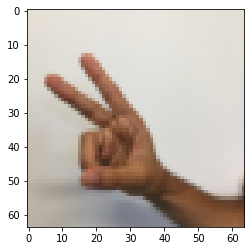

In [ ]:
# Example of a picture
index = 6
plt.imshow(X_train_orig[index])
print ("y = " + str(np.squeeze(Y_train_orig[:, index])))

In [ ]:
X_train = X_train_orig/255.
X_test = X_test_orig/255.
Y_train = convert_to_one_hot(Y_train_orig, 6).T
Y_test = convert_to_one_hot(Y_test_orig, 6).T
print ("number of training examples = " + str(X_train.shape[0]))
print ("number of test examples = " + str(X_test.shape[0]))
print ("X_train shape: " + str(X_train.shape))
print ("Y_train shape: " + str(Y_train.shape))
print ("X_test shape: " + str(X_test.shape))
print ("Y_test shape: " + str(Y_test.shape))
conv_layers = {}

number of training examples = 1080
number of test examples = 120
X_train shape: (1080, 64, 64, 3)
Y_train shape: (1080, 6)
X_test shape: (120, 64, 64, 3)
Y_test shape: (120, 6)


In [ ]:
def create_placeholders(n_H0, n_W0, n_C0, n_y):
  tf.compat.v1.disable_eager_execution()
  X = tf.placeholder(tf.float32, shape= [None, n_H0,n_W0, n_C0], name = 'X')
  Y = tf.placeholder(tf.float32, shape=[None, n_y], name= 'Y')

  return X, Y

In [ ]:
X, Y = create_placeholders(64, 64, 3, 6)
print ("X = " + str(X))
print ("Y = " + str(Y))

X = Tensor("X:0", shape=(?, 64, 64, 3), dtype=float32)
Y = Tensor("Y:0", shape=(?, 6), dtype=float32)


In [ ]:
def initialize_parameters():
  tf.set_random_seed(1)
  
  W1 = tf.get_variable("W1", [4, 4, 3, 8], initializer= tf.contrib.layers.xavier_initializer(seed=0))
  W2 = tf.get_variable("W2", [2, 2, 8, 16], initializer=tf.contrib.layers.xavier_initializer(seed=0))

  parameters = {"W1": W1,
                "W2": W2}

  return parameters

In [ ]:
tf.reset_default_graph()
with tf.Session() as sess_test:
    parameters = initialize_parameters()
    init = tf.global_variables_initializer()
    sess_test.run(init)
    print("W1[1,1,1] = \n" + str(parameters["W1"].eval()[1,1,1]))
    print("W1.shape: " + str(parameters["W1"].shape))
    print("\n")
    print("W2[1,1,1] = \n" + str(parameters["W2"].eval()[1,1,1]))
    print("W2.shape: " + str(parameters["W2"].shape))

The TensorFlow contrib module will not be included in TensorFlow 2.0.
For more information, please see:
  * https://github.com/tensorflow/community/blob/master/rfcs/20180907-contrib-sunset.md
  * https://github.com/tensorflow/addons
  * https://github.com/tensorflow/io (for I/O related ops)
If you depend on functionality not listed there, please file an issue.

W1[1,1,1] = 
[ 0.00131723  0.1417614  -0.04434952  0.09197326  0.14984085 -0.03514394
 -0.06847463  0.05245192]
W1.shape: (4, 4, 3, 8)


W2[1,1,1] = 
[-0.08566415  0.17750949  0.11974221  0.16773748 -0.0830943  -0.08058
 -0.00577033 -0.14643836  0.24162132 -0.05857408 -0.19055021  0.1345228
 -0.22779644 -0.1601823  -0.16117483 -0.10286498]
W2.shape: (2, 2, 8, 16)


In [ ]:
def forward_propagation(X, parameters):

  W1 = parameters["W1"]
  W2 = parameters["W2"]

  s = 1
  Z1 = tf.nn.conv2d(X, W1, strides= [1,s,s,1], padding= 'SAME')
  A1 = tf.nn.relu(Z1)
  
  f, s = 8, 8
  P1 = tf.nn.max_pool(A1, ksize=[1,f,f,1], strides=[1,s,s,1] ,padding='SAME')
  
  s = 1
  Z2 = tf.nn.conv2d(P1, W2, strides= [1,s,s,1], padding= 'SAME')
  A2 = tf.nn.relu(Z2)

  f, s = 4, 4
  P2 = tf.nn.max_pool(A2, ksize=[1,f,f,1], strides=[1,s,s,1], padding= 'SAME')

  F = tf.contrib.layers.flatten(P2)

  Z3 = tf.contrib.layers.fully_connected(F, num_outputs= 6, activation_fn= None)

  return Z3

In [ ]:
tf.reset_default_graph()

with tf.Session() as sess:
    np.random.seed(1)
    X, Y = create_placeholders(64, 64, 3, 6)
    parameters = initialize_parameters()
    Z3 = forward_propagation(X, parameters)
    init = tf.global_variables_initializer()
    sess.run(init)
    a = sess.run(Z3, {X: np.random.randn(2,64,64,3), Y: np.random.randn(2,6)})
    print("Z3 = \n" + str(a))

Instructions for updating:
Use keras.layers.flatten instead.
Instructions for updating:
Please use `layer.__call__` method instead.
Z3 = 
[[ 1.4416982  -0.24909668  5.4504995  -0.2618962  -0.20669872  1.3654671 ]
 [ 1.4070847  -0.02573182  5.08928    -0.4866991  -0.4094069   1.2624853 ]]


In [ ]:
def compute_cost(Z3, Y):

  cost = tf.reduce_mean(tf.nn.softmax_cross_entropy_with_logits(logits = Z3, labels = Y))

  return cost

In [ ]:
tf.reset_default_graph()

with tf.Session() as sess:
    np.random.seed(1)
    X, Y = create_placeholders(64, 64, 3, 6)
    parameters = initialize_parameters()
    Z3 = forward_propagation(X, parameters)
    cost = compute_cost(Z3, Y)
    init = tf.global_variables_initializer()
    sess.run(init)
    a = sess.run(cost, {X: np.random.randn(4,64,64,3), Y: np.random.randn(4,6)})
    print("cost = " + str(a))

Instructions for updating:

Future major versions of TensorFlow will allow gradients to flow
into the labels input on backprop by default.

See `tf.nn.softmax_cross_entropy_with_logits_v2`.

cost = 4.6648703


In [ ]:
def model(X_train, Y_train, X_test, Y_test, learning_rate = 0.009,
          num_epochs = 100, minibatch_size = 64, print_cost = True):
  
  ops.reset_default_graph()                         # to be able to rerun the model without overwriting tf variables
  tf.set_random_seed(1)                             # to keep results consistent (tensorflow seed)
  seed = 3                                          # to keep results consistent (numpy seed)
  (m, n_H0, n_W0, n_C0) = X_train.shape             
  n_Y = Y_train.shape[1]                            
  costs = []                                        # To keep track of the cost
  
  X, Y = create_placeholders(n_H0, n_W0, n_C0, n_Y)

  parameters = initialize_parameters()

  Z3 = forward_propagation(X, parameters)

  cost = compute_cost(Z3, Y)

  optimizer = tf.train.AdamOptimizer(learning_rate= learning_rate).minimize(cost)

  init = tf.global_variables_initializer()

  with tf.Session() as sess:

    sess.run(init)

    for epoch in range(num_epochs):
      minibatch_cost = 0
      num_minibatches = int(m/minibatch_size)
      seed = seed + 1
      minibatches = random_mini_batches(X_train, Y_train, minibatch_size, seed)

      for minibatch in minibatches:
        minibatch_X, minibatch_Y = minibatch

        _ , temp_cost = sess.run([optimizer, cost], feed_dict={X:minibatch_X, Y:minibatch_Y})

        minibatch_cost += temp_cost / num_minibatches

      if print_cost == True and epoch % 5 == 0:
          print ("Cost after epoch %i: %f" % (epoch, minibatch_cost))
      if print_cost == True and epoch % 1 == 0:
          costs.append(minibatch_cost)
  
  
  # plot the cost
  plt.plot(np.squeeze(costs))
  plt.ylabel('cost')
  plt.xlabel('iterations (per tens)')
  plt.title("Learning rate =" + str(learning_rate))
  plt.show()

  # Calculate the correct predictions
  predict_op = tf.argmax(Z3, 1)
  correct_prediction = tf.equal(predict_op, tf.argmax(Y, 1))
  
  # Calculate accuracy on the test set
  accuracy = tf.reduce_mean(tf.cast(correct_prediction, "float"))
  print(accuracy)
  train_accuracy = accuracy.eval({X: X_train, Y: Y_train})
  test_accuracy = accuracy.eval({X: X_test, Y: Y_test})
  print("Train Accuracy:", train_accuracy)
  print("Test Accuracy:", test_accuracy)
          
  return train_accuracy, test_accuracy, parameters

Cost after epoch 0: 1.921332
Cost after epoch 5: 1.904156
Cost after epoch 10: 1.904309
Cost after epoch 15: 1.904477
Cost after epoch 20: 1.901869
Cost after epoch 25: 1.740181
Cost after epoch 30: 1.664650
Cost after epoch 35: 1.626261
Cost after epoch 40: 1.620045
Cost after epoch 45: 1.580173
Cost after epoch 50: 1.550707
Cost after epoch 55: 1.486015
Cost after epoch 60: 1.373514
Cost after epoch 65: 1.266907
Cost after epoch 70: 1.180652
Cost after epoch 75: 1.141219
Cost after epoch 80: 1.072382
Cost after epoch 85: 1.064842
Cost after epoch 90: 1.018332
Cost after epoch 95: 0.989791


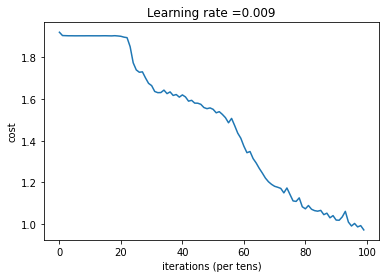

Tensor("Mean_1:0", shape=(), dtype=float32)
Train Accuracy: 0.6657407
Test Accuracy: 0.525


In [ ]:
_, _, parameters = model(X_train, Y_train, X_test, Y_test)